In [52]:
# <><> Gabriel Aragão - 2021 <><>
# TODO: a class for a dataset(std deviation,mean)
#     : 

# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

class dataset(object):
    '''dataset class for data generation'''
    def __init__(self,desvio,media):
        self.desvio = desvio
        self.media  = media
        

In [23]:
# funcao densidade de probabilidade para 2 variaveis
def pdf2var(x,y,u1,u2,s1,s2,p):
    # x ,y : indices do ponto no espaco R^2
    # u1,u2: media media de cada variavel no dataset 
    # s1,s2: desvio padrao de cada variavel no dataset
    # p    : coeficiente de correlacao 
    A = (1/(2*np.pi*s1*s2*np.sqrt(1-(p**2))))
    B = ((-(1)/(2*(1-(p**2)))))
    C = ((x-u1)**2)/((s1**2))
    D = (((y-u2)**2)/((s2)**2))
    E = ((-2*p*(x-u1)*(y-u2))/(s1*s2)) #termo de covariancia
    return A*np.exp(B*(C+D+E))
    

In [24]:
# mesuring probability surface for both datasets
def genSurface(mgenA,dgenA,mgenB,dgenB,correlacao,M1,M2):
    ci = 0
    mgenA[0] -= 0.03
    for i in seqi:
        ci = ci + 1
        cj = 0
        
        if mgenA[0] < 0:
           mgenA[0] = 7 
        for j in seqj:
            cj = cj + 1
            
            aux  = pdf2var(i,j,mgenA[0],mgenA[1],dgenA[0],dgenA[1],correlacao)
            aux2 = pdf2var(i,j,mgenB[0],mgenB[1],dgenB[0],dgenB[1],correlacao)
            #print(ci,cj,'--', aux, aux2)
            M1[0][ci-1][cj-1] = aux
            M2[0][ci-1][cj-1] = aux2
    return M1,M2

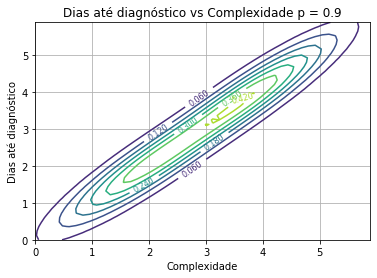

In [119]:
# printing first frame of data sequence

M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
#surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig, ax = plt.subplots()
CS = plt.contour(X,Y,M1[0]+M2[0])
ax.clabel(CS,inline=1,fontsize=8)
plt.plot()
#plt.contour(X,Y,M2[0])
#plt.scatter(xgenA,ygenA, color = 'r',marker =".")
plt.plot()
#plt.scatter(xgenB,ygenB, color = 'g',marker ='.')

# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1]+' p = '+str(correlacao))
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()

plt.show()

[4.070910493141161, 3.871985516447213] [1.0214227686959954, 0.9432581598039177]
[1.8922524021355773, 1.8707255431568541] [1.0315257158055031, 0.9728266152386511]


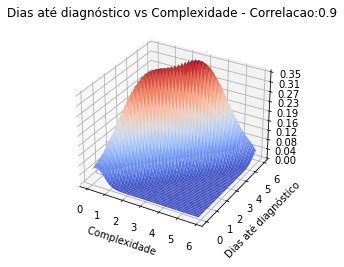

In [118]:


# defining mean and standard deviation

mu = 0.5
sigma = 0.1

# setup random module
np.random.seed(0)
numPoints = 200

# generating data set A
xgenA = np.random.normal(mu*8,sigma*10,(numPoints,1))
ygenA = np.random.normal(mu*8,sigma*10,(numPoints,1))

# calculando media (mgenA) e desvio (dgenA) estimado do data set A
mgenA = [np.mean(xgenA),np.mean(ygenA)]
dgenA = [np.std(xgenA) ,np.std(ygenA) ]
print(mgenA,dgenA)

# gen data set B
xgenB = np.random.normal(mu*4,sigma*10,(numPoints,1))
ygenB = np.random.normal(mu*4,sigma*10,(numPoints,1))

# calculando media e desvio estimado do data set B
mgenB = [np.mean(xgenB),np.mean(ygenB)]
dgenB = [np.std(xgenB) ,np.std(ygenB) ]
print(mgenB,dgenB)

# generate evenly spaced points
seqi = np.arange(0,6,0.12)
seqj = np.arange(0,6,0.12)
X,Y = np.meshgrid(seqi,seqj)

M1 = [np.zeros([len(seqi),len(seqj)])]
M2 = [np.zeros([len(seqi),len(seqj)])]



plt.ion()
fig = plt.figure()
ax = fig.gca(projection='3d')
# dataset params
correlacao = 0.9
steps = 20

M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Customize the z axis.
ax.set_zlim(0,0.35)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade ']
plt.title(eixos[0]+' vs '+eixos[1]+'- Correlacao:'+str(correlacao))
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
#input('press enter to continue')


plt.show()

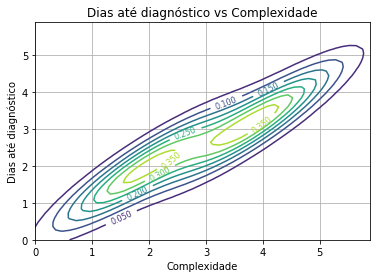

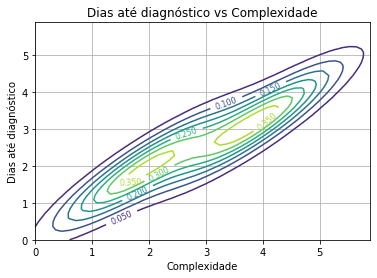

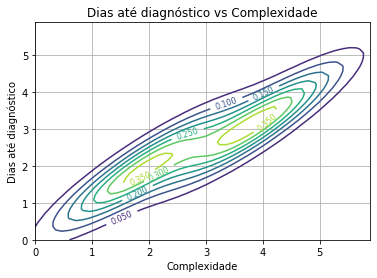

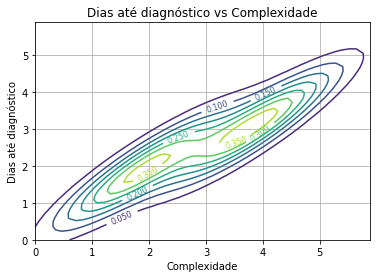

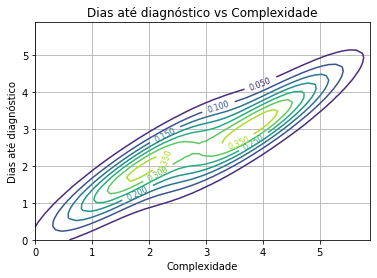

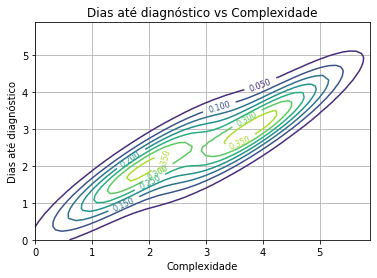

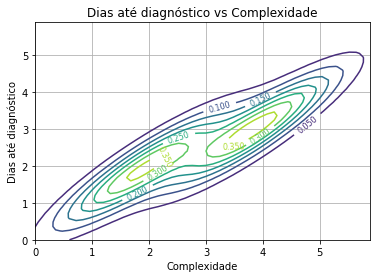

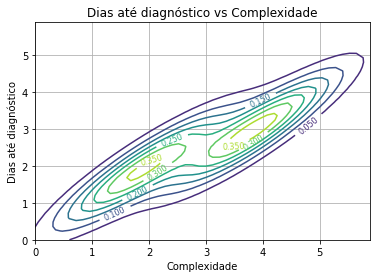

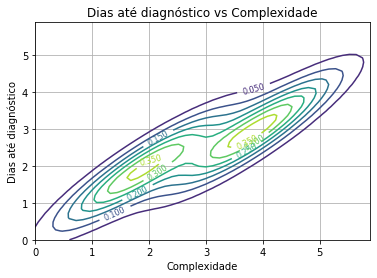

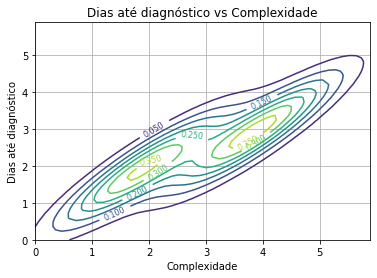

In [94]:
def Multiplot(steps):
    for i in range(5):
        for j in range(2):
            axarr[j][i] = contorno(M1,M2)
    return axarr
array = Multiplot(1)
array[0][0]



press enter to continue


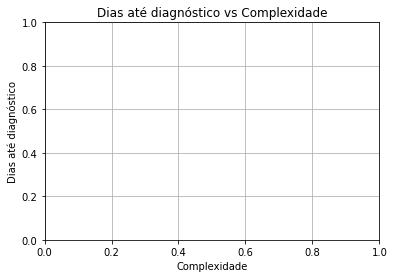

In [59]:
M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Customize the z axis.
ax.set_zlim(0,0.5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
input('press enter to continue')


plt.show()


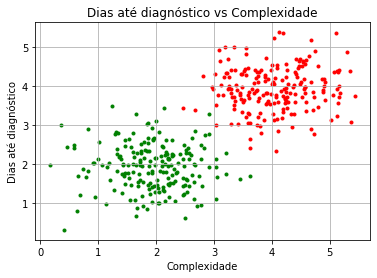

In [44]:
# printing first frame of data sequence
M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
#surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
plt.figure()
plt.scatter(xgenA,ygenA, color = 'r',marker =".")
plt.plot()
plt.scatter(xgenB,ygenB, color = 'g',marker ='.')

# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()

plt.show()
#plt.pause(10)
    

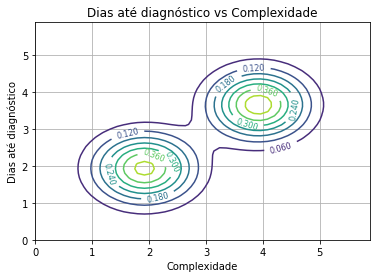

In [42]:
# printing first frame of data sequence
M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
#surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig, ax = plt.subplots()
CS = plt.contour(X,Y,M1[0]+M2[0])
ax.clabel(CS,inline=1,fontsize=8)
plt.plot()
#plt.contour(X,Y,M2[0])
#plt.scatter(xgenA,ygenA, color = 'r',marker =".")
plt.plot()
#plt.scatter(xgenB,ygenB, color = 'g',marker ='.')

# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()

plt.show()
#plt.pause(10)